 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_publicas.xlsx')

In [3]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna
0,0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12
1,1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12
2,2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1
3,3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1
4,4,Finalizada,Vivienda,Menos de 1 año,6990.315,8


In [4]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
target = obras['plazo_años'].unique()
print("\n", obras['plazo_años'].unique())


 ['De 2 a 3 años' 'De 1 a 2 años' 'Menos de 1 año' 'Más de 3 años']


In [7]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras.iloc[:,3]
y

0       De 2 a 3 años
1       De 1 a 2 años
2       De 1 a 2 años
3       De 2 a 3 años
4      Menos de 1 año
            ...      
929    Menos de 1 año
930    Menos de 1 año
931    Menos de 1 año
932    Menos de 1 año
933    Menos de 1 año
Name: plazo_años, Length: 883, dtype: object

In [8]:
# Al ser una variable categórica la vamos a transformar

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras['Encoded'] = y

## FEATURES

In [9]:
tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12,1,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Menos de 1 año,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Menos de 1 año,2325.368,8,2,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Menos de 1 año,1984.627,8,2,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Menos de 1 año,6557.067,9,2,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Menos de 1 año,22279.428,15,2,0,0,1,0,0,0,0


In [10]:
x = obras.iloc[:,4:]
x

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,1,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,1,0,0,1,0,0,0,0
4,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,2,0,0,1,0,0,0,0
930,1984.627,8,2,0,0,1,0,0,0,0
931,6557.067,9,2,0,0,1,0,0,0,0
932,22279.428,15,2,0,0,1,0,0,0,0


In [11]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x = x.drop(['Encoded'],axis=1)
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [12]:
obras['Encoded'].value_counts()

2    655
0    179
1     36
3     13
Name: Encoded, dtype: int64

In [13]:
y.shape

(883,)

In [14]:
x.shape

(883, 9)

Al encontrarnos frente a un Imbalanced dataset multi-class classification problem (Clasificación multi clase de un dataset no balanceado), se utilizará la técnica de aumentar las samples de las clases menores, a fin de balancear el dataset.

In [15]:
from sklearn.utils import resample

# Primero separamos las clases

obras_majority1 = obras[obras.Encoded==2]
obras_majority2 = obras[obras.Encoded==0]
obras_minority1 = obras[obras.Encoded==1]
obras_minority2 = obras[obras.Encoded==3]

# Generamos samples para que las 4 clases tengan el mismo peso

obras_majority2_upsampled = resample(obras_majority2, replace=True, n_samples=655, random_state=8)
obras_minority1_upsampled = resample(obras_minority1, replace=True, n_samples=655, random_state=8)
obras_minority2_upsampled = resample(obras_minority2, replace=True, n_samples=655, random_state=8)

# Combinamos todas las clases y contamos los valores

obras_upsampled = pd.concat([obras_majority1,obras_majority2_upsampled,obras_minority1_upsampled,obras_minority2_upsampled])

obras_upsampled['Encoded'].value_counts()

3    655
1    655
2    655
0    655
Name: Encoded, dtype: int64

In [16]:
obras_upsampled.shape

(2620, 14)

In [17]:
obras_upsampled.tail()

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
566,679,Finalizada,Escuelas,Más de 3 años,4374.885,15,3,0,1,0,0,0,0,0
39,39,Finalizada,Arquitectura,Más de 3 años,103608.164,8,3,1,0,0,0,0,0,0
362,424,Finalizada,Escuelas,Más de 3 años,6499.921,4,3,0,1,0,0,0,0,0
56,56,Finalizada,Hidráulica e Infraestructura,Más de 3 años,145125.053,4,3,0,0,0,1,0,0,0
147,152,Finalizada,Salud,Más de 3 años,105154.463,9,3,0,0,0,0,1,0,0


In [18]:
y = obras_upsampled.iloc[:,3]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras_upsampled['Encoded'] = y

In [19]:
y.shape

(2620,)

In [20]:
#tipo_obras_upsampled = pd.get_dummies(obras_upsampled.tipo)
#obras_upsampled = obras_upsampled.join(tipo_obras_upsampled)
x = obras_upsampled.iloc[:,4:]
x = x.drop(['Encoded'],axis=1)

In [21]:
x.shape

(2620, 9)

## PRE PROCESAMIENTO

In [22]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [23]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (1834, 9)
Se corresponde con el "Y" de entrenamiento (1834,)


In [24]:
scaler = preprocessing.StandardScaler().fit(xtrain)


In [25]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [26]:
xtrain_scaled.shape

(1834, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [27]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [28]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.8249787823290303


In [29]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.82 


In [30]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [31]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

In [32]:
print(classification_report(ytest, ypred_svc))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       200
           1       0.86      0.89      0.87       187
           2       0.76      0.67      0.71       204
           3       0.92      1.00      0.96       195

    accuracy                           0.82       786
   macro avg       0.82      0.82      0.82       786
weighted avg       0.82      0.82      0.82       786



### KNN Classifier

In [33]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [34]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.9263888268489152
El accuracy obtenido fue de 0.95 


In [35]:
rdos = rdos.append({'Clasificador':'KNN',
                    'Accuracy': score_knn}, ignore_index=True)

In [36]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [37]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

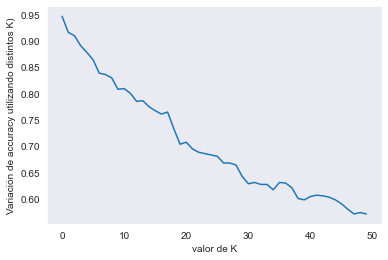

In [59]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [39]:
# Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. 

rdos

,Clasificador,Accuracy
0,SVC,0.820611
1,KNN,0.946565


### Random Forest Classifier

In [40]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [41]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 50}
El score obtenido fue:  0.9383868614225518
El accuracy obtenido fue de 0.95 


In [42]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [43]:
rdos

,Clasificador,Accuracy
0,SVC,0.820611
1,KNN,0.946565
2,Random Forest,0.949109


### Logistic Regression 

In [44]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [45]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 70}
El score obtenido fue:  0.5136344009171989
El accuracy obtenido fue de 0.54 


In [46]:
rdos = rdos.append({'Clasificador':'LR',
                   'Accuracy': score_lr}, ignore_index=True)

In [47]:
rdos

,Clasificador,Accuracy
0,SVC,0.820611
1,KNN,0.946565
2,Random Forest,0.949109
3,LR,0.535623


### One Vs Rest Classifier (SVM)

In [48]:
# Al ser un problema de clasificación multiclase, probamos con OVO y OVR

ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [49]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR',
                   'Accuracy': score_ovr}, ignore_index=True)

In [50]:
rdos

,Clasificador,Accuracy
0,SVC,0.820611
1,KNN,0.946565
2,Random Forest,0.949109
3,LR,0.535623
4,OVR,0.597964


### One Vs One Classifier (SVM)

In [51]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [52]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.5534351145038168

In [53]:
rdos = rdos.append({'Clasificador':'OVO',
                   'Accuracy': score_ovo}, ignore_index=True)

In [54]:
rdos

,Clasificador,Accuracy
0,SVC,0.820611
1,KNN,0.946565
2,Random Forest,0.949109
3,LR,0.535623
4,OVR,0.597964
5,OVO,0.553435


## Resultados / Visualización

In [55]:
from sklearn.metrics import plot_confusion_matrix

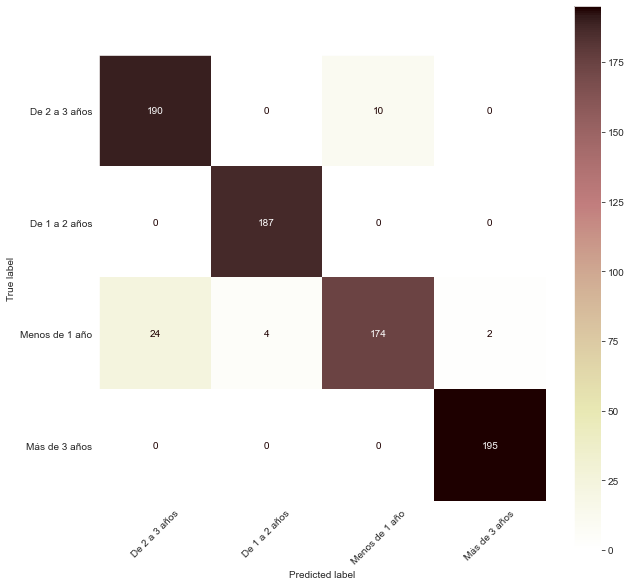

In [57]:
labels = obras['plazo_años'].unique()
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45,
                            ax=ax)

In [58]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       200
           1       0.98      1.00      0.99       187
           2       0.95      0.85      0.90       204
           3       0.99      1.00      0.99       195

    accuracy                           0.95       786
   macro avg       0.95      0.95      0.95       786
weighted avg       0.95      0.95      0.95       786



## Conclusiones / Observaciones

En este caso, decidimos realizar bandas de clasificación mucho más amplias (duración 1 año), y el resultado luego de realizar el resample como fue explicado en el Notebook de ML por trimestres, nos arroja valores mucho más altos de accuracy, sin embargo, esta sustancial mejora implica que nuestra clasificación sea imprecisa dado que estamos clasificando con un horizonte temporal muy amplio. 
Ej: Una obra que sea realizada en 2 meses, será clasificada como que llevará "Menos de un año" lo cual es correcto, pero para una información más precisa, la mejor opción es el modelo de ML por trimestres, que en el ejemplo mencionado anteriormente clasificará como "Hasta 3 meses"